X.shape: (1000, 2)
y.shape: (1000,)


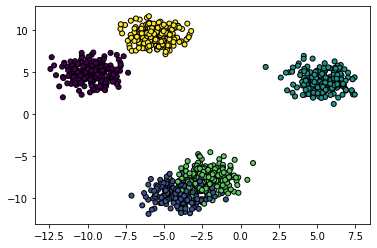

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

num_centers = 5

X, y = make_blobs(n_samples=1000,  n_features=2, centers=num_centers)

print ('X.shape:', X.shape)
print ('y.shape:', y.shape)

# note the color coding of clusters
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

In [2]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=2).fit(X)
print ("num clusters : ", len(ms.cluster_centers_))
print (ms.cluster_centers_)

num clusters :  4
[[-3.30534346 -8.86480601]
 [-5.5480729   9.34177417]
 [ 5.51218563  3.88347517]
 [-9.76353544  4.82759237]]


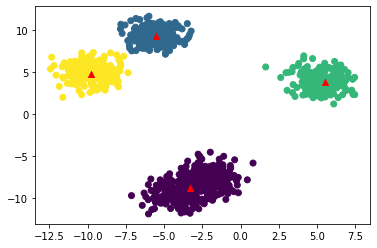

In [3]:
## plot predicted results
y_pred = ms.predict(X)

## now observe the color coding of clusters
## do they match?
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(ms.cluster_centers_[:][0:,0], ms.cluster_centers_[:][0:,1], marker='^', c='red')

bandwidth=0.5, num clusters=123, silhoutte_score=0.2900199781348858
bandwidth=1, num clusters=10, silhoutte_score=0.33014942335344166
bandwidth=1.5, num clusters=5, silhoutte_score=0.6325018971665831
bandwidth=2, num clusters=4, silhoutte_score=0.7851552598718722
bandwidth=2.5, num clusters=4, silhoutte_score=0.7851552598718722
bandwidth=3, num clusters=4, silhoutte_score=0.7851552598718722


<AxesSubplot:xlabel='bandwidth'>

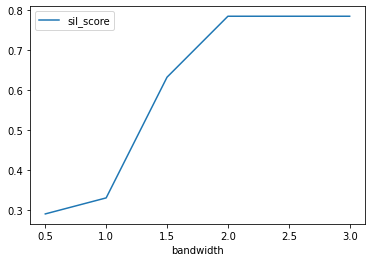

In [4]:
#Experiment
#Change the bandwidth in step-2 and run the algorithm. Does it change the predicted clusters?

#Iterate over bandwidth (silhouette_score)
from sklearn.cluster import MeanShift
from  sklearn.metrics import silhouette_score

bandwidths = [0.5, 1, 1.5, 2, 2.5, 3]
sil_scores = []
for bandwidth in bandwidths:
  ms = MeanShift(bandwidth=bandwidth).fit(X)
  y_pred = ms.predict(X)
  sil_score = silhouette_score (X, y_pred)
  sil_scores.append(sil_score)
  print ("bandwidth={}, num clusters={}, silhoutte_score={}".format(
      bandwidth, len(ms.cluster_centers_), sil_score))
import pandas as pd
df_sil = pd.DataFrame({'bandwidth': bandwidths, 'sil_score':sil_scores})
df_sil
df_sil.plot(x="bandwidth")

bandwidth=0.5, num clusters=123, ch_score=4765.900126119166
bandwidth=1, num clusters=10, ch_score=5567.688576289564
bandwidth=1.5, num clusters=5, ch_score=10195.120098970856
bandwidth=2, num clusters=4, ch_score=9389.312360551623
bandwidth=2.5, num clusters=4, ch_score=9389.312360551625
bandwidth=3, num clusters=4, ch_score=9389.312360551623


<AxesSubplot:xlabel='bandwidth'>

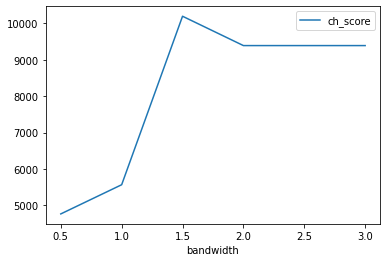

In [5]:
#Iterate over bandwidth (Calinski-Harabasz)
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import MeanShift

ch_scores = []

bandwidths = [0.5, 1, 1.5, 2, 2.5, 3]
sil_scores = []
for bandwidth in bandwidths:
  ms = MeanShift(bandwidth=bandwidth).fit(X)
  y_pred = ms.predict(X)
  ch_score = calinski_harabasz_score (X, y_pred)
  ch_scores.append(ch_score)
  print ("bandwidth={}, num clusters={}, ch_score={}".format(
      bandwidth, len(ms.cluster_centers_), ch_score))
import pandas as pd
df_ch = pd.DataFrame({'bandwidth': bandwidths, 'ch_score':ch_scores})
df_ch
df_ch.plot(x="bandwidth")


From Calinski-Harabasz, optimal bandwidth= 1.5
num clusters :  5


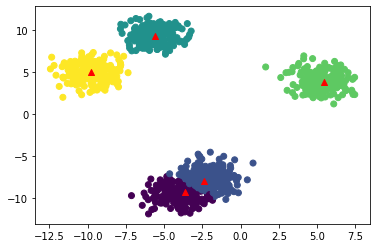

In [6]:
#Find the Optimal Bandwidth
import numpy as np

# from ch_scores
max_index_of_score = np.argmax(df_ch['ch_score'])
optimal_bandwidth = df_ch['bandwidth'].iloc[max_index_of_score]
print ("From Calinski-Harabasz, optimal bandwidth=", optimal_bandwidth)
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=optimal_bandwidth).fit(X)
print ("num clusters : ", len(ms.cluster_centers_))
y_pred = ms.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(ms.cluster_centers_[:][0:,0], ms.cluster_centers_[:][0:,1], marker='^', c='red')